## Graph MAPPING boxplot

In [1]:
import glob
import subprocess as sbp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
map = pd.read_csv("/Users/luasoares/DOC/COMPARE/02_RefGeno_analysis/05_MAPPING/porcent_mapping_genomes.txt", sep="\t")
map

,Samples,Grupo,P.axillaris II,P.axillaris I,P.inflata,P.secreta,N.sylvestris,S. habrochaites
0,1_Palti320_R,alt80,0.87,0.87,0.91,0.88,0.35,0.28
1,2_Palti321_R,alt80,0.86,0.86,0.90,0.86,0.36,0.28
2,3_Palti323_R,alt80,0.86,0.86,0.90,0.86,0.38,0.30
3,4_Palti325_R,alt80,0.87,0.87,0.91,0.87,0.34,0.27
4,5_Palti330_S,alt80,0.81,0.81,0.85,0.82,0.37,0.30
...,...,...,...,...,...,...,...,...
145,146_send114,phylo,0.72,0.72,0.73,0.72,0.45,0.38
146,147_send117,phylo,0.62,0.63,0.63,0.63,0.38,0.31
147,148_send121,phylo,0.76,0.76,0.77,0.76,0.48,0.41
148,149_send54,phylo,0.74,0.74,0.75,0.74,0.45,0.38


In [8]:
list(map)

['Samples',
 'Grupo',
 'P.axillaris II',
 'P.axillaris I',
 'P.inflata',
 'P.secreta',
 'N.sylvestris',
 'S. habrochaites']

In [13]:
# Melt the DataFrame to long format
map_long = map.melt(
    id_vars=['Samples', 'Grupo'],
    value_vars=['P.axillaris II', 'P.axillaris I', 'P.inflata', 'P.secreta', 'N.sylvestris', 'S. habrochaites'],
    var_name='Reference_Genome',
    value_name='Mapping'
)
map_long

,Samples,Grupo,Reference_Genome,Mapping
0,1_Palti320_R,alt80,P.axillaris II,0.87
1,2_Palti321_R,alt80,P.axillaris II,0.86
2,3_Palti323_R,alt80,P.axillaris II,0.86
3,4_Palti325_R,alt80,P.axillaris II,0.87
4,5_Palti330_S,alt80,P.axillaris II,0.81
...,...,...,...,...
895,146_send114,phylo,S. habrochaites,0.38
896,147_send117,phylo,S. habrochaites,0.31
897,148_send121,phylo,S. habrochaites,0.41
898,149_send54,phylo,S. habrochaites,0.38


In [20]:
group_labels ={
    "alt80" : "POP",
    "grp41" : "Intra-P4",
    "phylo" : "Inter-C5"}
genome_label ={     
 'P.axillaris II': 'P. axillaris II',
 'P.axillaris I': 'P. axillaris I',
 'P.inflata': 'P. inflata',
 'P.secreta': 'P. secreta',
 'N.sylvestris': 'N. sylvestris',
 'S. habrochaites': 'S. habrochaites'}

In [15]:
# If genome_label is italicized strings, use that order
genome_label_order = [
                     "P. inflata",
                     "P. axillaris I",
                     "P. axillaris II",
                     "P. secreta",
                     "N. sylvestris",
                     "S. habrochaites",
                     "de novo"]

In [21]:
map_long['group_label'] = map_long['Grupo'].map(group_labels)
map_long['genome_label'] = map_long['Reference_Genome'].map(genome_label)
map_long

,Samples,Grupo,Reference_Genome,Mapping,group_label,genome_label
0,1_Palti320_R,alt80,P.axillaris II,0.87,POP,P. axillaris II
1,2_Palti321_R,alt80,P.axillaris II,0.86,POP,P. axillaris II
2,3_Palti323_R,alt80,P.axillaris II,0.86,POP,P. axillaris II
3,4_Palti325_R,alt80,P.axillaris II,0.87,POP,P. axillaris II
4,5_Palti330_S,alt80,P.axillaris II,0.81,POP,P. axillaris II
...,...,...,...,...,...,...
895,146_send114,phylo,S. habrochaites,0.38,Inter-C5,S. habrochaites
896,147_send117,phylo,S. habrochaites,0.31,Inter-C5,S. habrochaites
897,148_send121,phylo,S. habrochaites,0.41,Inter-C5,S. habrochaites
898,149_send54,phylo,S. habrochaites,0.38,Inter-C5,S. habrochaites


In [22]:
colors = {
    "P. inflata": "#4792b0",
    "P. axillaris I" : "#dc5646",
    "P. axillaris II": "#8a312b",
    "P. secreta": "#fdc46d",
    "N. sylvestris": "#A05C7B",
    "S. habrochaites" : "#5E9D7E",
    "de novo": "#b3b3b3"
}
# If genome_label is italicized strings, use that order
genome_label_order = [
                     "P. inflata",
                     "P. axillaris I",
                     "P. axillaris II",
                     "P. secreta",
                     "N. sylvestris",
                     "S. habrochaites"
                     ]

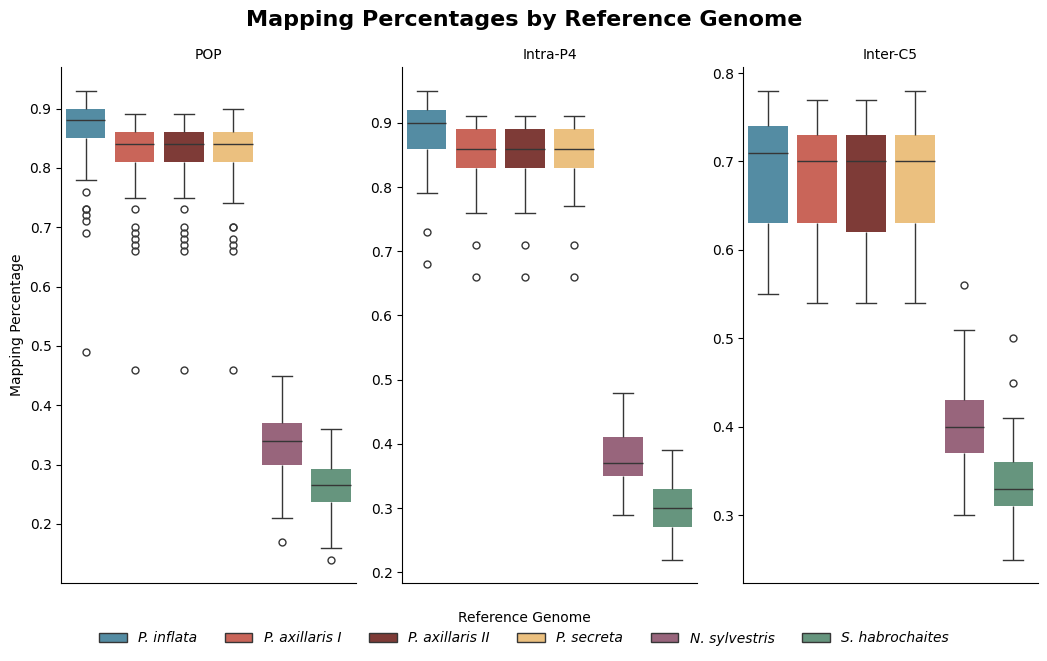

In [54]:
boxprops = dict(linestyle='')
# Create the faceted boxplots
g = sns.catplot(
    data=map_long,
    x='genome_label',
    y='Mapping',
    hue='genome_label',
    col='group_label',
    kind='box',
    boxprops=boxprops,
    palette=colors,
    height=6,
    aspect=0.5,
    sharey=False,
    legend=True, # ✅ Add the legend,
    order=genome_label_order,       # ✅ set x-axis order
    hue_order=genome_label_order    # ✅ set hue order
)

# Customize
g.set_axis_labels("", "Mapping Percentage")
g.set_titles(col_template="{col_name}")


# Remove x-ticks entirely
for ax in g.axes.flat:
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    
# Adjust layout
g.fig.subplots_adjust(top=0.9, hspace=0.3, wspace=0.2)
g.fig.suptitle(
    "Mapping Percentages by Reference Genome",
    fontsize=16,
    fontweight='bold'
)

# # plt.savefig("mapping_boxplot.png", dpi=300, bbox_inches='tight')
# plt.show()


# # Move row labels to the left side
# for ax, row_name in zip(g.axes[:, 0], map_long['statistic'].unique()):
#     ax.set_ylabel(row_name, fontsize=12, fontweight='bold', rotation=90, labelpad=10)

# # Remove default facet labels on top and add custom group labels
# for ax, col_name in zip(g.axes[0, :], df_long['group_label'].unique()):
#     ax.set_title(f"Group: {col_name}", fontsize=12, fontweight='bold')

# # Remove row facet titles (statistics shown on left)
# g.set_titles(col_template="{col_name}", row_template="")

# # Adjust layout and legend
# g.fig.subplots_adjust(top=0.9, left=0.1, hspace=0.3, wspace=0.2)

# ✅ Move legend outside the plot
g._legend.set_title("Reference Genome")
sns.move_legend(g, "lower center", bbox_to_anchor=(0.5, -0.1), ncol=6, frameon=False)

# # Add main title
# g.fig.suptitle(
#     "Population-Level Statistics by Reference Genome",
#     fontsize=14,
#     fontweight='bold'
# )
# Make legend labels italic
for text in g._legend.texts:
    text.set_fontstyle('italic')

# for ax in g.axes.flat:
#     for artist in ax.artists:
#         artist.set_edgecolor('white')
#         artist.set_linewidth(0.5)  # removes box border


plt.tight_layout()
plt.savefig("Mapping-percentages-ref-genome.svg", format="svg", bbox_inches='tight')
plt.savefig("Mapping-percentages-ref-genome.png", format="png", bbox_inches='tight')
plt.show()
